### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

### **Data Loading and Overview**

In [ ]:
df = pd.read_csv("../data/interim/cleaned_turbo_az.csv")
df.head()

,Price,Make,Model,Year,Color,Kilometer,Transmission,New,Engine_Size,Horsepower,Fuel_Type
0,72100.0,Kia,K5,2024,Boz,0,Avtomat,Bəli,2.5,194,Benzin
1,41000.0,Kia,K5,2020,Qırmızı,154000,Avtomat,Xeyr,1.6,180,Benzin
2,24500.0,Kia,Forte,2019,Göy,126330,Variator,Xeyr,2.0,147,Benzin
3,321100.0,Mercedes,G 63 AMG,2019,Qara,48000,Avtomat,Xeyr,4.0,585,Benzin
4,79900.0,BMW,530e,2022,Qara,25000,Avtomat,Xeyr,2.0,292,Plug-in Hibrid


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         1391 non-null   float64
 1   Make          1391 non-null   object 
 2   Model         1391 non-null   object 
 3   Year          1391 non-null   int64  
 4   Color         1391 non-null   object 
 5   Kilometer     1391 non-null   int64  
 6   Transmission  1391 non-null   object 
 7   New           1391 non-null   object 
 8   Engine_Size   1391 non-null   float64
 9   Horsepower    1391 non-null   int64  
 10  Fuel_Type     1391 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 119.7+ KB


In [ ]:
df.describe()

,Price,Year,Kilometer,Engine_Size,Horsepower
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,73386.094464,2020.910855,61676.971963,2.105607,224.567218
std,70223.232790,1.641404,47866.505802,0.518532,93.335711
min,13599.000000,2019.000000,0.000000,1.400000,107.000000
25%,36800.000000,2019.000000,25000.000000,2.000000,150.000000
50%,50830.000000,2021.000000,55000.000000,2.000000,194.000000
75%,79900.000000,2022.000000,88944.000000,2.000000,258.000000
max,765943.500000,2024.000000,285000.000000,4.500000,900.000000


In [ ]:
df.describe(include='object')

,Make,Model,Color,Transmission,New,Fuel_Type
count,1391,1391,1391,1391,1391,1391
unique,4,24,15,4,2,4
top,Hyundai,Elantra,Qara,Avtomat,Xeyr,Benzin
freq,528,198,481,1262,1253,874


### **Exploratory Data Analysis (EDA)**

In [ ]:
# Shows columns with detected outliers based on IQR.
numeric_cols = ['Price', 'Year', 'Kilometer', 'Engine_Size', 'Horsepower']

Q1, Q3 = df[numeric_cols].quantile(0.25), df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))

outlier_columns = outliers.any(axis=0)
outlier_columns = outlier_columns[outlier_columns].index

outlier_columns

Index(['Price', 'Kilometer', 'Engine_Size', 'Horsepower'], dtype='object')

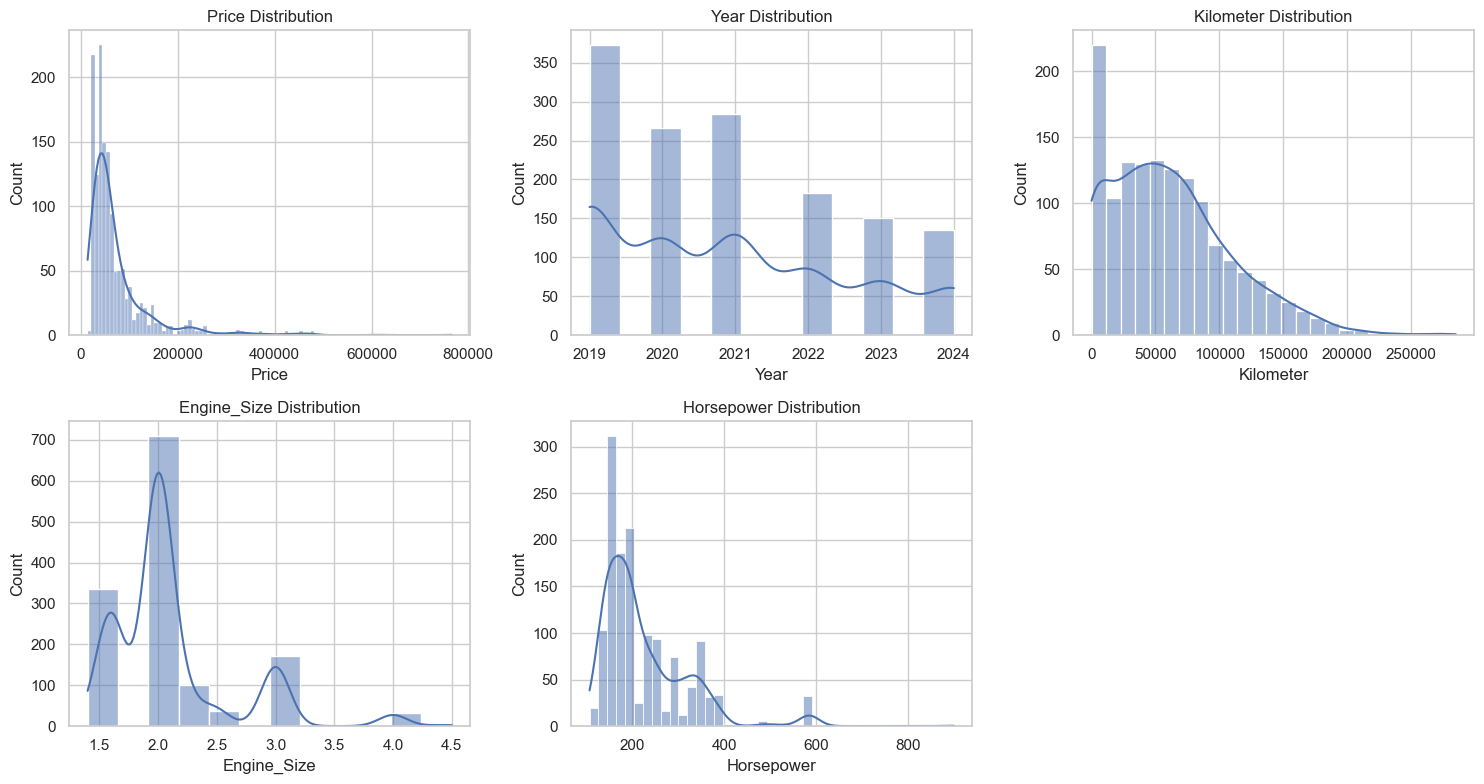

In [ ]:
# Visualizes distribution of numerical features.
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

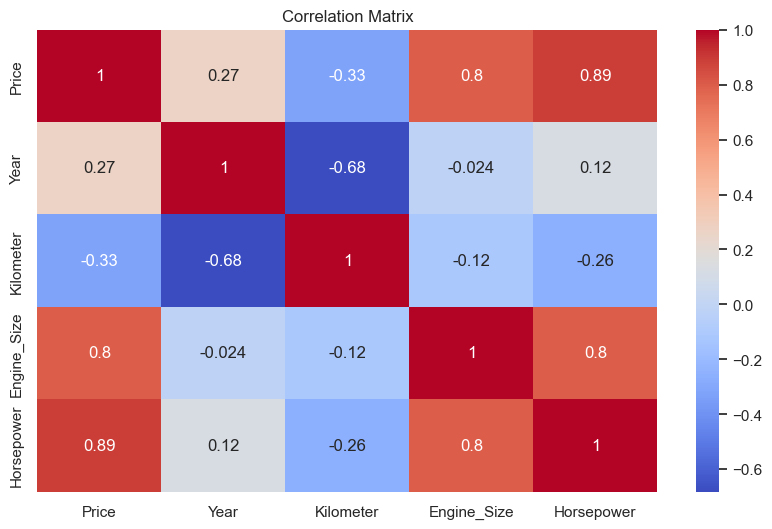

In [ ]:
# Shows correlations between numerical columns.
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


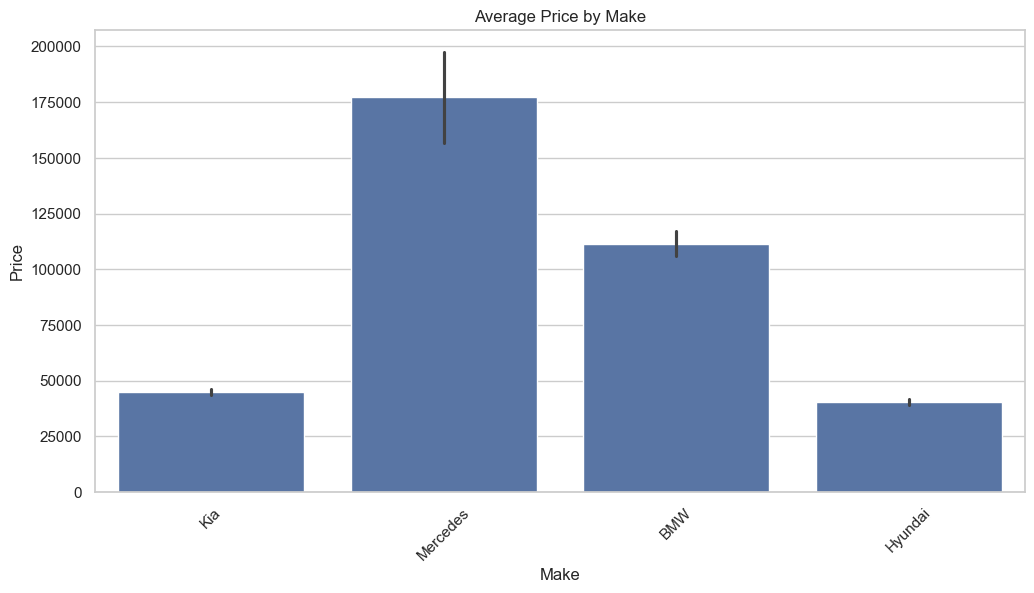

In [ ]:
# Compares average price across different makes.
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Price', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Price by Make")
plt.show()

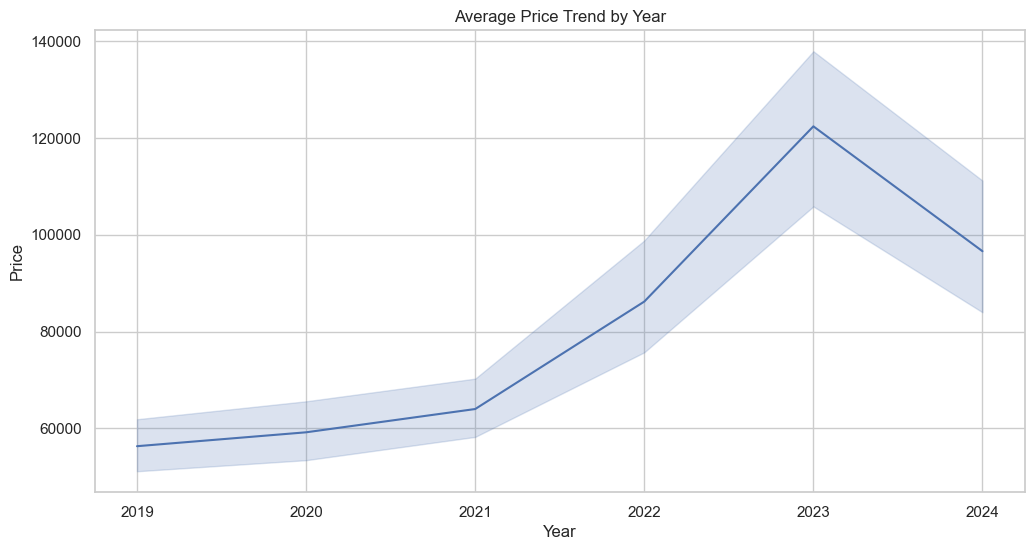

In [ ]:
# Shows price trend over the years.
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Price', data=df, estimator=np.mean)
plt.title("Average Price Trend by Year")
plt.show()

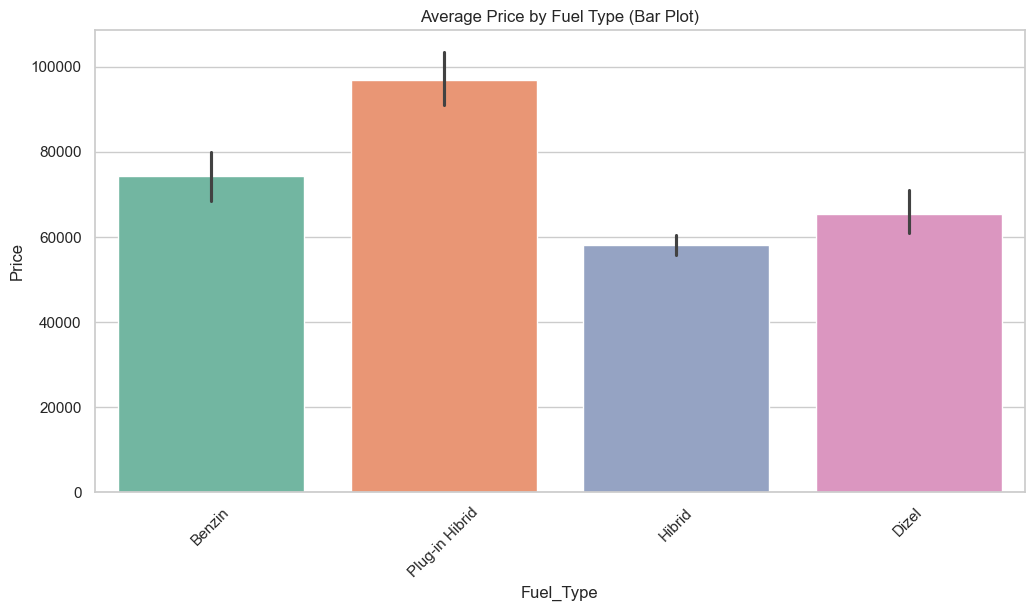

In [ ]:
# Shows average price by fuel type.
plt.figure(figsize=(12, 6))
sns.barplot(x='Fuel_Type', y='Price', data=df, estimator=np.mean, palette='Set2')
plt.title("Average Price by Fuel Type (Bar Plot)")
plt.xticks(rotation=45)
plt.show()

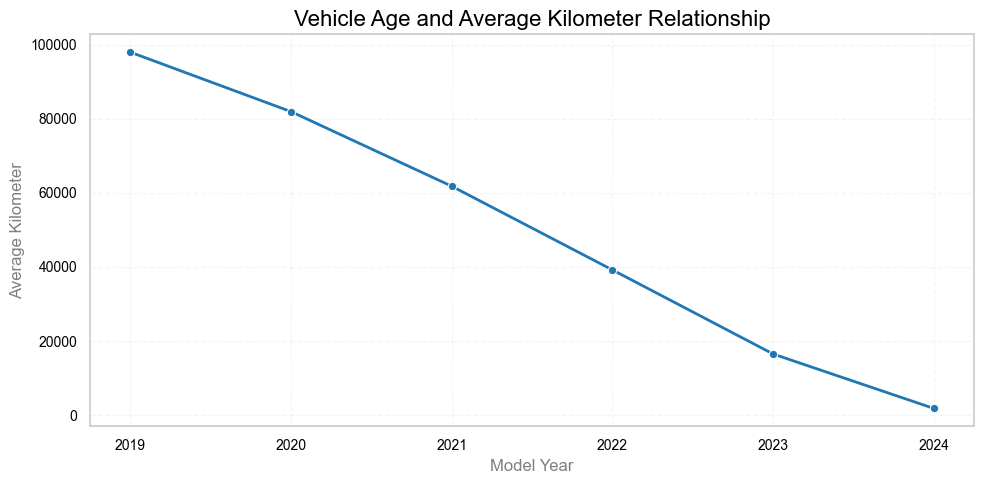

In [ ]:
# Examines relationship between vehicle age and kilometers.
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=df["Year"], y=df["Kilometer"], 
    estimator="mean", ci=None, marker="o", linewidth=2, color="#1f77b4"
)
plt.title("Vehicle Age and Average Kilometer Relationship", fontsize=16, fontweight="regular", color="black")
plt.xlabel("Model Year", fontsize=12, color="gray")
plt.ylabel("Average Kilometer", fontsize=12, color="gray")
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")
plt.grid(True, linestyle="--", alpha=0.2)
plt.tight_layout()
plt.show()

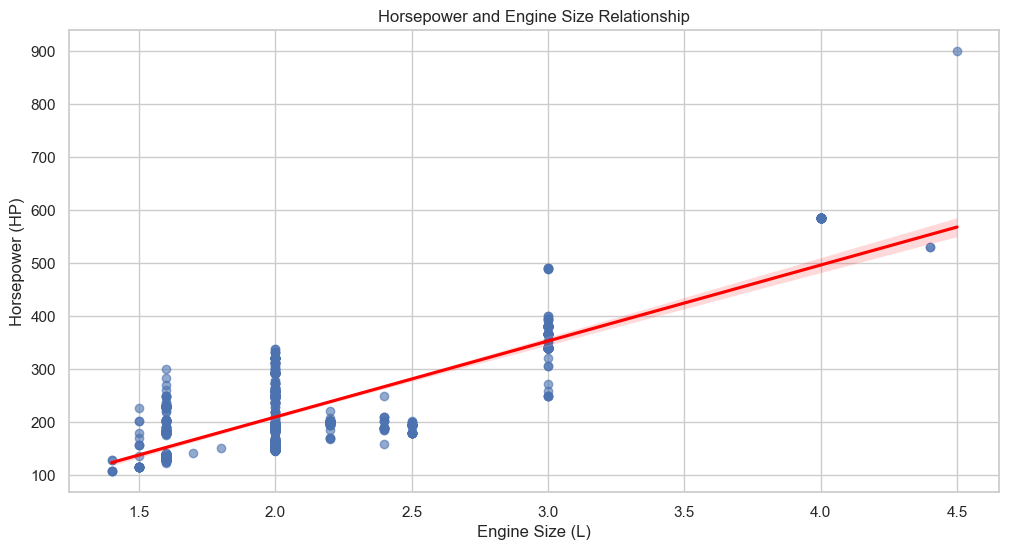

In [ ]:
# Visualizes relationship between engine size and horsepower.
plt.figure(figsize=(12, 6))
sns.regplot(x=df["Engine_Size"], y=df["Horsepower"], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Horsepower and Engine Size Relationship")
plt.xlabel("Engine Size (L)")
plt.ylabel("Horsepower (HP)")
plt.show()